<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#군집분석-과제" data-toc-modified-id="군집분석-과제-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>군집분석 과제</a></span><ul class="toc-item"><li><span><a href="#Q1-최적의-k-값-찾으세요." data-toc-modified-id="Q1-최적의-k-값-찾으세요.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Q1 최적의 k 값 찾으세요.</a></span></li><li><span><a href="#Q2-콜린스키하라바츠스코어-구하세요." data-toc-modified-id="Q2-콜린스키하라바츠스코어-구하세요.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Q2 콜린스키하라바츠스코어 구하세요.</a></span></li><li><span><a href="#Q3-SSE구하세요" data-toc-modified-id="Q3-SSE구하세요-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Q3 SSE구하세요</a></span></li><li><span><a href="#Q4-군집분석한-결과를-해석하세요" data-toc-modified-id="Q4-군집분석한-결과를-해석하세요-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Q4 군집분석한 결과를 해석하세요</a></span><ul class="toc-item"><li><span><a href="#결과-해석" data-toc-modified-id="결과-해석-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>결과 해석</a></span></li></ul></li></ul></li></ul></div>

# 군집분석 과제 

In [16]:
import pandas as pd

In [28]:
df = pd.read_csv("./data/USArrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


위의 데이터에서 Murder	Assault	UrbanPop	Rape를 가지고 아래와 같이  K-means 군집분석을 진행하세요 
- 1) 최적의 k 값 찾으세요. 
- 2) 콜린스키하라바츠스코어 구하세요. 
- 3) SSE구하세요 
- 4) 군집분석한 결과를 해석하세요 

## Q1 최적의 k 값 찾으세요.

In [18]:
df.columns = ['State','Murder','Assault','UrbanPop','Rape']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [19]:
# 필요한 모듈
from sklearn.cluster import KMeans

X= df.drop(columns=['State'])
X.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


## Q2 콜린스키하라바츠스코어 구하세요.

In [20]:
# 군집분석 평가척도: 콜린스키 하라바츠
from sklearn.metrics import calinski_harabasz_score

In [21]:
# 클러스터별 콜린스키 하라바츠 결과 비교
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print(k,calinski_harabasz_score(X, labels))

2 129.16750641095095
3 150.82736111645258
4 141.76241251642008
5 152.68636141181392
6 158.03230599203238
7 156.2208581572518
8 154.16122402657848
9 158.78597024253023


## Q3 SSE구하세요

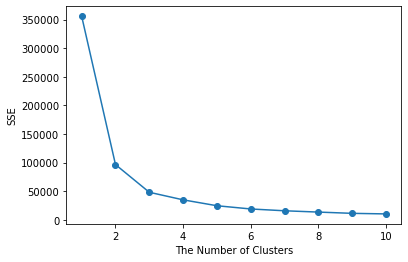

[355807.8216, 96399.02814449917, 47964.26535714286, 34728.629357142854, 24417.023523809527, 18768.000666666667, 15606.797750000002, 13329.361976190477, 11125.033809523811, 10121.137809523809]


In [22]:
# 엘보우 기법
import matplotlib.pyplot as plt
def elbow(X):
    sse=[]
    for i in range(1, 11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(X)

## Q4 군집분석한 결과를 해석하세요

In [23]:
kmeans_model = KMeans(n_clusters=3).fit(X)

In [24]:
df['cluster'] = kmeans_model.labels_

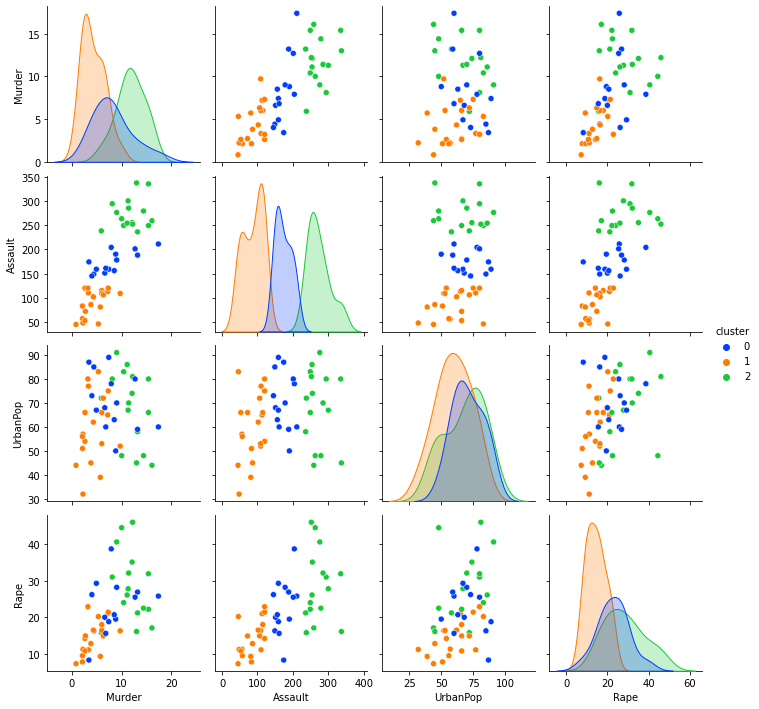

In [27]:
# 원본 데이터 iris target 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df,
             diag_kind='kde',
             hue="cluster",
#             corner = True,  #직각삼각형 모양으로 산점도 행렬 만드려면 주석해제
             palette='bright')
plt.show()

### 결과 해석
1. 콜린스키 하라비츠 지수를 보았을 때, 군집 간 분산 / 군집 내 분산 의 비율이 군집이 2개일 때 151, 3개일 때 142이다.  
1. 엘보우 기법으로 봤을 때, 2~3개 사이에서 군집 내 SSE가 급격히 작아지고 그 이상의 군집 수에서는 SSE 감소 효과가 작다.  
1. 따라서, SSE 감소 효과와 (군집 간 분산/군집 내 분산) 비율 2가지를 모두 따져봤을 때 적절한 군집 수는 3 이다.
1. 군집 수 3개로 분석해봤을 때, 독립변수 Assault에 대해서는 3개의 군집으로 잘 묶고 있다.  
1. 나머지 Murder, UrbanPop, Rape 독립번수에 대해서는 군집을 명확하게 묶어주고 있지 않다.